# Wrangle and Analyze Data
### _By Siddharth Shankar_

## Introduction
The project is primarily focused on data wrangling taught in the Udacity DAND program along with analyzing and visualizing the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

The goal is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. 

## The Data
### Enhanced Twitter Archive

The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which is used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, it has been filtered for tweets with ratings only (there are 2356).

### Additional Data via the Twitter API

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But you, because you have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? You're going to query Twitter's API to gather this valuable data.

### Image Predictions File

The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and will be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv


## Key Points

- We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate the skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- We do not need to gather the tweets beyond August 1st, 2017. We can, but note that we won't be able to gather the image predictions for these tweets since we don't have access to the algorithm used.

## Gather

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read twitter archive enhanced CSV (comma-separated) file into DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [5]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
fails_dict = {}
# Save each tweet's returned JSON as a new line in a .txt file
def fetch_tweet():
    count = 0
    start = timer()
    with open('tweet_json.txt', 'a+') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    total_time = round((end - start)/60,2)
    print("Total Time Taken: {} mins".format(total_time))
    
fetch_tweet()
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Fail
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 8

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [6]:
# Convert fails_dict to list
tweet_ids = list(fails_dict.keys())
fails_dict.clear()
# Re-run Twitter API for failed tweet ids once to minimize failed attempts due to network congestion or error
fetch_tweet()
print("Fails Dictionary: {}".format(fails_dict))

1: 888202515573088257
Fail
2: 873697596434513921
Fail
3: 872668790621863937
Fail
4: 872261713294495745
Fail
5: 869988702071779329
Fail
6: 868639477480148993
Success
7: 866816280283807744
Fail
8: 861769973181624320
Fail
9: 845459076796616705
Fail
10: 842892208864923648
Fail
11: 839290600511926273
Success
12: 837012587749474308
Fail
13: 827228250799742977
Fail
14: 812747805718642688
Fail
15: 802247111496568832
Fail
16: 775096608509886464
Fail
17: 770743923962707968
Fail
18: 754011816964026368
Fail
19: 680055455951884288
Fail
Total Time Taken: 0.19 mins
Fails Dictionary: {888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 869988702071779329: TweepError([{'code': 144, 'messa

In [5]:
# Read tweet_json.txt and create a list of tweet id, favorite count and retweet count
tweets_list = list()
with open('tweet_json.txt') as json_file:  
    for line in json_file:
        json_data = json.loads(line)
        # Pretty-print 1 record to view json structure
        #print(json.dumps(json_data,indent=4))
        #break
        tweet_id = json_data['id']
        created_at = json_data['created_at']
        if('extended_entities' in json_data):
            media_url_https = json_data['extended_entities']['media'][0]['media_url_https']
        else:
            media_url_https = "NA"
        favorite_count = json_data['favorite_count']
        retweet_count = json_data['retweet_count']
        user_id = json_data['user']['id']
        screen_name = json_data['user']['screen_name']
        followers_count = json_data['user']['followers_count']
        friends_count = json_data['user']['friends_count']
        statuses_count = json_data['user']['statuses_count']
        verified = json_data['user']['verified']
        tweets_list.append({'tweet_id': int(tweet_id),
                            'timestamp': pd.to_datetime(created_at),
                            'media_url_https': str(media_url_https),
                            'favorite_count': int(favorite_count),
                            'retweet_count': int(retweet_count),
                            'user_id': int(user_id),
                            'screen_name': str(screen_name),
                            'followers_count': int(followers_count),
                            'friends_count': int(friends_count),
                            'statuses_count': int(statuses_count),
                            'verified': str(verified)
                            })
# Write the tweets into DataFrame using tweets_list      
tweets_df = pd.DataFrame(tweets_list, columns = ['tweet_id', 'timestamp', 'media_url_https',
                                                 'favorite_count', 'retweet_count', 'user_id',
                                                'screen_name', 'followers_count', 'friends_count',
                                                'statuses_count', 'verified'])
# Save the tweets DataFrame as a CSV file
tweets_df.to_csv('tweets_json.csv', index=False)

In [6]:
# Read tweets json CSV (comma-separated) file into DataFrame
tweets_json = pd.read_csv('tweets_json.csv')

In [7]:
# Download tweet image predictions file from Udacity server's given URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'  
r = requests.get(url)

with open('image-predictions.tsv', 'wb') as f:  
    f.write(r.content)

In [8]:
# Read image predictions TSV (Tab-separated) file into DataFrame
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

## Assess

### Visual Assessment

In [9]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
tweets_json

,tweet_id,timestamp,media_url_https,favorite_count,retweet_count,user_id,screen_name,followers_count,friends_count,statuses_count,verified
0,892420643555336193,2017-08-01 16:23:56+00:00,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,37791,8236,4196983835,dog_rates,7852062,12,9877,True
1,892177421306343426,2017-08-01 00:17:27+00:00,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,32470,6087,4196983835,dog_rates,7852062,12,9877,True
2,891815181378084864,2017-07-31 00:18:03+00:00,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,24440,4028,4196983835,dog_rates,7852062,12,9877,True
3,891689557279858688,2017-07-30 15:58:51+00:00,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,41119,8393,4196983835,dog_rates,7852062,12,9877,True
4,891327558926688256,2017-07-29 16:00:24+00:00,https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,39333,9090,4196983835,dog_rates,7852062,12,9877,True
5,891087950875897856,2017-07-29 00:08:17+00:00,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,19768,3016,4196983835,dog_rates,7852063,12,9877,True
6,890971913173991426,2017-07-28 16:27:12+00:00,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,11559,1993,4196983835,dog_rates,7852063,12,9877,True
7,890729181411237888,2017-07-28 00:22:40+00:00,https://pbs.twimg.com/media/DFyBag_UQAAhhBC.jpg,63747,18308,4196983835,dog_rates,7852063,12,9877,True
8,890609185150312448,2017-07-27 16:25:51+00:00,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,27166,4142,4196983835,dog_rates,7852063,12,9877,True
9,890240255349198849,2017-07-26 15:59:51+00:00,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,31146,7156,4196983835,dog_rates,7852063,12,9877,True


In [11]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Programmatic Assessment: 1. twitter_archive DataFrame

In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
sum(twitter_archive.tweet_id.duplicated())

0

In [14]:
sum(twitter_archive.expanded_urls.isnull())

59

In [15]:
with pd.option_context('display.max_colwidth', 200):
    df_lower = twitter_archive.loc[(twitter_archive['name'].str.islower())]
    display(df_lower[['tweet_id','text','name']])

,tweet_id,text,name
22,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
56,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
118,869988702071779329,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,quite
169,859196978902773760,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
193,855459453768019968,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
335,832645525019123713,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,not
369,828650029636317184,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
542,806219024703037440,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
649,792913359805018113,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
682,788552643979468800,RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX,mad


In [16]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### Programmatic Assessment: 2. tweets_json DataFrame

In [17]:
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 11 columns):
tweet_id           2339 non-null int64
timestamp          2339 non-null object
media_url_https    2065 non-null object
favorite_count     2339 non-null int64
retweet_count      2339 non-null int64
user_id            2339 non-null int64
screen_name        2339 non-null object
followers_count    2339 non-null int64
friends_count      2339 non-null int64
statuses_count     2339 non-null int64
verified           2339 non-null bool
dtypes: bool(1), int64(7), object(3)
memory usage: 185.1+ KB


In [18]:
sum(tweets_json['media_url_https'].isnull())

274

In [19]:
tweets_json[tweets_json['media_url_https'].duplicated()]

,tweet_id,timestamp,media_url_https,favorite_count,retweet_count,user_id,screen_name,followers_count,friends_count,statuses_count,verified
31,886054160059072513,2017-07-15 02:45:48+00:00,NaN,0,104,4196983835,dog_rates,7852065,12,9877,True
34,885518971528720385,2017-07-13 15:19:09+00:00,NaN,19952,3642,4196983835,dog_rates,7852065,12,9877,True
41,884247878851493888,2017-07-10 03:08:17+00:00,NaN,71229,19920,4196983835,dog_rates,7852067,12,9877,True
54,881633300179243008,2017-07-02 21:58:53+00:00,NaN,124,7,4196983835,dog_rates,7852067,12,9877,True
63,879674319642796034,2017-06-27 12:14:36+00:00,NaN,302,10,4196983835,dog_rates,7852067,12,9877,True
67,879130579576475649,2017-06-26 00:13:58+00:00,NaN,0,6634,4196983835,dog_rates,7852068,12,9877,True
71,878604707211726852,2017-06-24 13:24:20+00:00,NaN,29563,7010,4196983835,dog_rates,7852069,12,9877,True
72,878404777348136964,2017-06-24 00:09:53+00:00,NaN,0,1252,4196983835,dog_rates,7852068,12,9877,True
73,878316110768087041,2017-06-23 18:17:33+00:00,NaN,0,6477,4196983835,dog_rates,7852068,12,9877,True
82,876537666061221889,2017-06-18 20:30:39+00:00,NaN,23021,4529,4196983835,dog_rates,7852070,12,9877,True


In [20]:
tweets_json[tweets_json['favorite_count'] > 100000]

,tweet_id,timestamp,media_url_https,favorite_count,retweet_count,user_id,screen_name,followers_count,friends_count,statuses_count,verified
65,879415818425184262,2017-06-26 19:07:24+00:00,https://pbs.twimg.com/ext_tw_video_thumb/87941...,103375,43116,4196983835,dog_rates,7852067,12,9877,True
128,866450705531457537,2017-05-22 00:28:40+00:00,https://pbs.twimg.com/media/DAZAUfBXYAAHtni.jpg,121182,35168,4196983835,dog_rates,7852077,12,9877,True
400,822872901745569793,2017-01-21 18:26:02+00:00,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,139460,47298,4196983835,dog_rates,7852704,12,9877,True
520,807106840509214720,2016-12-09 06:17:20+00:00,https://pbs.twimg.com/ext_tw_video_thumb/80710...,126156,60507,4196983835,dog_rates,7852704,12,9877,True
1021,744234799360020481,2016-06-18 18:26:18+00:00,https://pbs.twimg.com/ext_tw_video_thumb/74423...,163184,82974,4196983835,dog_rates,7852708,12,9877,True
1061,739238157791694849,2016-06-04 23:31:25+00:00,https://pbs.twimg.com/ext_tw_video_thumb/73923...,120567,61446,4196983835,dog_rates,7852708,12,9877,True


In [21]:
tweets_json[tweets_json['retweet_count'] > 80000]

,tweet_id,timestamp,media_url_https,favorite_count,retweet_count,user_id,screen_name,followers_count,friends_count,statuses_count,verified
1021,744234799360020481,2016-06-18 18:26:18+00:00,https://pbs.twimg.com/ext_tw_video_thumb/74423...,163184,82974,4196983835,dog_rates,7852708,12,9877,True


### Programmatic Assessment: 3. image_predictions DataFrame

In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
beagle                        18
Eskimo_dog                    18
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [24]:
sum(image_predictions['jpg_url'].duplicated())

66

### Quality
#### twitter_archive dataframe
- 181 Retweets, not original ratings
- Erraneous datatypes (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, timestamp, retweeted_status_timestamp)
- Dog stages in multiple columns
- NaN values in expanded_urls column
- None values in columns instead of NaN
- Incorrect dog names
- Denominator values other than 10

#### tweets_json dataframe
- Erraneous datatype (timestamp)
- Null values in media_url_https
- Outliers in favorite_count & retweet_count

#### image_predictions dataframe
- Picture names contain names other than dog names

### Tidiness
- Duplicate records in media_url_https column in tweets_json dataframe and in jpg_url column in image_predictions dataframe
- All 3 dataframes can be combined into one with required columns only

## Clean

In [25]:
# Create copy of original data before cleaning
df_1 = twitter_archive.copy()
df_2 = tweets_json.copy()
df_3 = image_predictions.copy()

#### Define

- Delete retweets from df_1 (twitter_archive) dataframe
- Changing Erraneous datatypes in df_1 (twitter_archive) and df_2 (tweets_json) dataframes (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, timestamp, retweeted_status_timestamp)




#### Code

In [26]:
# Delete retweets from df_1
df_1.drop(df_1[df_1['retweeted_status_id'] > 0].index, inplace=True)

In [27]:
# Code to change erraneous datatypes
# First fill NaN with numeric data such as 0 then change datatype, otherwise it will throw ValueError
df_1['in_reply_to_status_id'] = df_1['in_reply_to_status_id'].fillna(0).astype(int)
df_1['in_reply_to_user_id'] = df_1['in_reply_to_user_id'].fillna(0).astype(int)
df_1['retweeted_status_id'] = df_1['retweeted_status_id'].fillna(0).astype(int)
df_1['retweeted_status_user_id'] = df_1['retweeted_status_user_id'].fillna(0).astype(int)
df_1['timestamp'] = pd.to_datetime(df_1['timestamp'])
df_1['retweeted_status_timestamp'] = pd.to_datetime(df_1['retweeted_status_timestamp'])

df_2['timestamp'] = pd.to_datetime(df_2['timestamp'])

#### Test

In [28]:
df_1.info()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         2175 non-null int64
in_reply_to_user_id           2175 non-null int64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           2175 non-null int64
retweeted_status_user_id      2175 non-null int64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetim

#### Define
- Replace None values with NaN in all columns of df_1 dataframe


#### Code

In [29]:
df_1.replace('None', np.nan, inplace=True)

#### Test

In [30]:
df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
219,850145622816686080,0,0,2017-04-07 00:38:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Riley. He's making new friends. Jubila...,0,0,NaT,https://twitter.com/dog_rates/status/850145622...,11,10,Riley,NaN,NaN,NaN,NaN
1142,727524757080539137,0,0,2016-05-03 15:46:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This pupper had to undergo emergency haircut s...,0,0,NaT,https://twitter.com/dog_rates/status/727524757...,10,10,NaN,NaN,NaN,pupper,NaN
1054,742423170473463808,0,0,2016-06-13 18:27:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bell. She likes holding hands. 12/10 w...,0,0,NaT,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,NaN,NaN,NaN,NaN
2253,667793409583771648,0,0,2015-11-20 19:55:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Dogs only please. Small cows and other non can...,0,0,NaT,https://twitter.com/dog_rates/status/667793409...,8,10,NaN,NaN,NaN,NaN,NaN
279,839990271299457024,0,0,2017-03-10 00:04:21+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sojourner. His nose is a Fibonacci Spiral...,0,0,NaT,https://twitter.com/dog_rates/status/839990271...,13,10,Sojourner,NaN,NaN,NaN,NaN


#### Define

- Combine (Melt) multiple dog stages doggo, floofer, pupper, & puppo into one column
- Remove columns which are not required from the df_1



#### Code

In [31]:
# Reshape the dog stages data to more user-friendly column
df_1 = pd.melt(df_1, id_vars = ['tweet_id', 'timestamp', 'text',
                              'rating_numerator', 'rating_denominator', 'name'],
                 value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                 var_name = 'stages', value_name = 'dogs_stage')
# Delete column stages
df_1.drop('stages', axis=1, inplace=True)

In [32]:
# Reshaping the dataframe has quadrupled the rows in df_1 dataframe i.e. records have been duplicated
# Remove the duplicate records considering dogs_stage column is not NaN
duplicated_rows = df_1[df_1.tweet_id.duplicated() & df_1.dogs_stage.isna()].index
df_1.drop(duplicated_rows, inplace=True)

#### Test

In [33]:
df_1.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
681,766714921925144576,2016-08-19 19:14:16+00:00,His name is Charley and he already has a new s...,13,10,NaN,NaN
5137,750868782890057730,2016-07-07 01:47:22+00:00,Meet Milo. He hauled ass until he ran out of t...,11,10,Milo,pupper
1128,707315916783140866,2016-03-08 21:23:50+00:00,This is Finnegus. He's trapped in a snow globe...,10,10,Finnegus,NaN
94,872122724285648897,2017-06-06 16:07:15+00:00,This is Kody. He's a baller. Wishes he was a l...,12,10,Kody,NaN
1229,699072405256409088,2016-02-15 03:27:04+00:00,ERMAHGERD 12/10 please enjoy https://t.co/7WrA...,12,10,NaN,NaN


#### Define
- Change incorrect dog names

#### Code

In [34]:
#Find incorrect dog names
df_1.name.fillna('NA', inplace=True)
df_1.loc[(df_1['name'].str.islower()) & (df_1['text'].str.contains('name is'))]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
689,765395769549590528,2016-08-16 03:52:26+00:00,This is my dog. Her name is Zoey. She knows I'...,13,10,my,NaN
2106,667177989038297088,2015-11-19 03:10:02+00:00,This is a Dasani Kingfisher from Maine. His na...,8,10,a,NaN


In [35]:
df_1.loc[689,'name'] = "Zoey"
df_1.loc[2106,'name'] = "Daryl"

In [36]:
df_1.loc[(df_1['name'].str.islower()) & (df_1['text'].str.contains('That is'))]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
817,748692773788876800,2016-07-01 01:40:41+00:00,That is Quizno. This is his beach. He does not...,10,10,his,doggo


In [37]:
df_1.loc[817,'name'] = "Quinzo"

In [38]:
df_1.query('name == "O"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
625,776201521193218049,2016-09-14 23:30:38+00:00,This is O'Malley. That is how he sleeps. Doesn...,10,10,O,NaN


In [39]:
df_1.loc[625,'name'] = "O'Malley"

In [40]:
named_df = df_1.loc[(df_1['name'].str.islower()) & (df_1['text'].str.contains('named'))]
named_data = named_df[['tweet_id', 'text']]
named_data

,tweet_id,text
1674,675706639471788032,This is a Sizzlin Menorah spaniel from Brookly...
1776,673636718965334016,This is a Lofted Aphrodisiac Terrier named Kip...
1855,671743150407421952,This is a Tuscaloosa Alcatraz named Jacob (Yac...
1887,671147085991960577,This is a Helvetica Listerine named Rufus. Thi...
1937,670427002554466305,This is a Deciduous Trimester mix named Spork....
1946,670361874861563904,This is a Rich Mahogany Seltzer named Cherokee...
1949,670303360680108032,This is a Speckled Cauliflower Yosemite named ...
1967,669923323644657664,This is a spotted Lipitor Rumpelstiltskin name...
1982,669564461267722241,This is a Coriander Baton Rouge named Alfredo....
2012,668955713004314625,This is a Slovakian Helter Skelter Feta named ...


In [41]:
# Replace incorrect dog names using loop
for index, row in named_data.iterrows():
    start_index = row['text'].find('named') + 6
    end_index = row['text'].find('.')
    dog_name = row['text'][start_index:end_index]
    df_1.loc[index,'name'] = dog_name

#### Test

In [42]:
df_1.loc[(df_1['name'].str.islower()) & (df_1['text'].str.contains('name is'))]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage


In [43]:
df_1.loc[(df_1['name'].str.islower()) & (df_1['text'].str.contains('That is'))]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage


In [44]:
df_1.query('name == "O"')

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage


In [45]:
df_1.loc[(df_1['name'].str.islower()) & (df_1['text'].str.contains('named'))]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage


#### Define
- Remove inconsistencies in denominator rating of df_1 dataframe

#### Code

In [46]:
with pd.option_context('display.max_colwidth', 200):
    df_denom1 = df_1[(df_1['rating_denominator'] < 10)]
    display(df_denom1[['tweet_id','text','rating_denominator']])
with pd.option_context('display.max_colwidth', 200):
    df_denom2 = df_1[(df_1['rating_denominator'] > 10)]
    display(df_denom2[['tweet_id','text','rating_denominator']])

,tweet_id,text,rating_denominator
263,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0
429,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
2154,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2


,tweet_id,text,rating_denominator
287,832088576586297345,@docmisterio account started on 11/15/15,15
363,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
733,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
890,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
942,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
987,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1024,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1050,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1075,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80
1095,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50


In [47]:
# Remove records that doesn't belong to dogs
for index, row in df_denom1.iterrows():
    df_1.drop(int(index), inplace=True)

In [48]:
df_1.drop(287, inplace=True)

#### Test

In [49]:
df_1[(df_1['rating_denominator'] < 10)]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage


#### Define
- Remove Null value records in media_url_https

#### Code

In [50]:
# Delete rows having null in media_url_https in df_2 dataframe
df_2.drop(df_2[df_2['media_url_https'].isna()].index, inplace=True)

#### Test

In [51]:
df_2[df_2['media_url_https'].isna()]

,tweet_id,timestamp,media_url_https,favorite_count,retweet_count,user_id,screen_name,followers_count,friends_count,statuses_count,verified


#### Define
- Remove outliers from favorite_count and retweet_count of df_2 dataframe

#### Code

In [52]:
fav_outliers = tweets_json[tweets_json['favorite_count'] > 80000]
#Drop outliers from fav_outliers
for index, row in fav_outliers.iterrows():
    df_2.drop(int(index), axis=0, inplace = True)

#### Test

In [53]:
df_2[df_2['favorite_count'] > 80000]

,tweet_id,timestamp,media_url_https,favorite_count,retweet_count,user_id,screen_name,followers_count,friends_count,statuses_count,verified


#### Define
- Remove records which have Picture names other than dog names from df_3 dataframe

#### Code

In [54]:
# Remove records which have picture names other than dog names
df3_dog = df_3[(df_3.p1_dog == False) & (df_3.p2_dog == False) & (df_3.p3_dog == False)]
for index, row in df3_dog.iterrows():
    df_3.drop(int(index), inplace=True)
    
df3_dog1 = df_3[(df_3.p1_dog == False) & (df_3.p2_dog == False)]
df3_dog2 = df_3[(df_3.p2_dog == False) & (df_3.p3_dog == False)]
df3_dog3 = df_3[(df_3.p1_dog == False)  & (df_3.p3_dog == False)]
for index, row in df3_dog1.iterrows():
    df_3.drop(int(index), inplace=True)
for index, row in df3_dog2.iterrows():
    df_3.drop(int(index), inplace=True)
for index, row in df3_dog3.iterrows():
    df_3.drop(int(index), inplace=True)




#### Test

In [55]:
df_3[(df_3.p1_dog == False) & (df_3.p2_dog == False) & (df_3.p3_dog == False)]
df_3[(df_3.p1_dog == False) & (df_3.p2_dog == False)]
df_3[(df_3.p2_dog == False) & (df_3.p3_dog == False)]
df_3[(df_3.p1_dog == False)  & (df_3.p3_dog == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Tidiness
- All 3 dataframes can be combined into one with required columns only
- Remove duplicate records
- Add a column for year and month from timestamp

#### Code

In [56]:
df_merged = pd.merge(df_1,df_2, on="tweet_id", how='inner')
df_merged = pd.merge(df_merged,df_3, on="tweet_id", how='inner')

In [57]:
columns = ['timestamp_y','media_url_https','user_id','screen_name','followers_count',
           'friends_count','statuses_count', 'verified', 'img_num']
df_merged.drop(columns, axis = 1, inplace = True)

In [58]:
# Convert dog_stage as category
df_merged['dogs_stage'] = df_merged['dogs_stage'].astype('category')

In [59]:
# Add year column in the dataframe
df_merged['year'] = pd.DatetimeIndex(df_merged['timestamp_x']).year 
df_merged['month'] = pd.DatetimeIndex(df_merged['timestamp_x']).month

#### Test

In [60]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1699 entries, 0 to 1698
Data columns (total 21 columns):
tweet_id              1699 non-null int64
timestamp_x           1699 non-null datetime64[ns, UTC]
text                  1699 non-null object
rating_numerator      1699 non-null int64
rating_denominator    1699 non-null int64
name                  1699 non-null object
dogs_stage            239 non-null category
favorite_count        1699 non-null int64
retweet_count         1699 non-null int64
jpg_url               1699 non-null object
p1                    1699 non-null object
p1_conf               1699 non-null float64
p1_dog                1699 non-null bool
p2                    1699 non-null object
p2_conf               1699 non-null float64
p2_dog                1699 non-null bool
p3                    1699 non-null object
p3_conf               1699 non-null float64
p3_dog                1699 non-null bool
year                  1699 non-null int64
month                 1699 n

In [61]:
# Save the df_merged as CSV
df_merged.to_csv('twitter_archive_master.csv', index=False)

## Analysis & Visualization

In [62]:
# Read the merged DataFrame
merged_df = pd.read_csv('twitter_archive_master.csv')
merged_df.sample(5)

,tweet_id,timestamp_x,text,rating_numerator,rating_denominator,name,dogs_stage,favorite_count,retweet_count,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,year,month
827,716791146589110272,2016-04-04 00:55:01+00:00,Meet Jennifur. She's supposed to be navigating...,11,10,Jennifur,NaN,6209,1510,https://pbs.twimg.com/media/CfKNvU8WsAAvI9Z.jpg,...,0.468751,True,seat_belt,0.154652,False,golden_retriever,0.125017,True,2016,4
651,750071704093859840,2016-07-04 21:00:04+00:00,Pause your cookout and admire this pupper's ni...,10,10,NaN,NaN,8226,3569,https://pbs.twimg.com/media/CmjKOzVWcAAQN6w.jpg,...,0.382113,True,malinois,0.249943,True,miniature_pinscher,0.070926,True,2016,7
1496,671518598289059840,2015-12-01 02:38:04+00:00,This is Scruffers. He's being violated on mult...,9,10,Scruffers,NaN,960,296,https://pbs.twimg.com/media/CVG2l9jUYAAwg-w.jpg,...,0.428275,True,wire-haired_fox_terrier,0.111472,True,toy_poodle,0.105016,True,2015,12
1376,674774481756377088,2015-12-10 02:15:47+00:00,This is Superpup. His head isn't proportional ...,11,10,Superpup,pupper,1142,492,https://pbs.twimg.com/media/CV1HztsWoAAuZwo.jpg,...,0.407016,True,French_bulldog,0.309978,True,Siamese_cat,0.227677,False,2015,12
1200,682429480204398592,2015-12-31 05:14:01+00:00,"I know we joke around on here, but this is get...",8,10,NaN,NaN,3577,1239,https://pbs.twimg.com/media/CXh5_dDWQAIbU-J.jpg,...,0.594701,True,Italian_greyhound,0.314091,True,Mexican_hairless,0.037773,True,2015,12


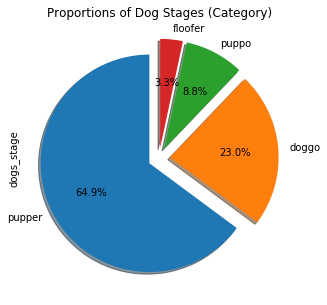

In [63]:
# Create pie chart for categorical data Dog Stages
merged_df.dogs_stage.value_counts().plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', startangle=90,
                                         explode=(0.1,0.1,0.1,0.1), shadow=True,
                                         title="Proportions of Dog Stages (Category)");
plt.savefig('dog_stages_pie_chart.png')

The various dog stages are as defined:
1. **Doggo**: A big pupper, usually older
2. **Pupper**: A small doggo, usually younger
3. **Puppo**: A transitional phase between doggo and pupper
4. **Floofer**: Any dog really. This label is given to dogs with seemingly exccess fur

In [64]:
# Calculate mean of dogs_stage based on numerator rating
merged_df[merged_df['dogs_stage'] != np.nan].groupby('dogs_stage')['rating_numerator'].mean()

dogs_stage
doggo      11.890909
floofer    11.875000
pupper     11.032258
puppo      11.952381
Name: rating_numerator, dtype: float64

Though Pupper is the most owned dog but its mean is less than other dog stages. It can be true as pupper is a small doggo, usually younger and being preferred by people.

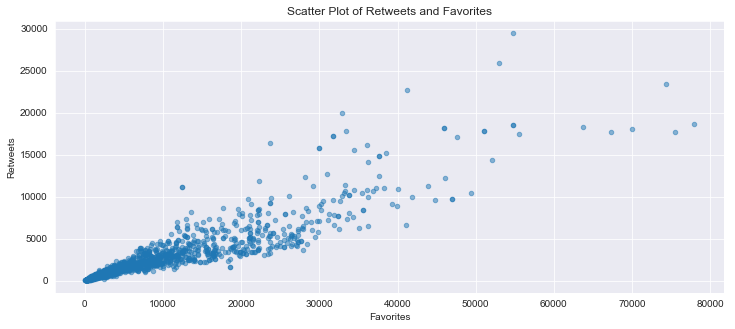

In [65]:
# Scatter plot for retweet & favorite counts
sns.set_style("darkgrid")
merged_df.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5, figsize=(12,5))
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Scatter Plot of Retweets and Favorites')
# Save the plot as png file
plt.savefig('scatterplot.png')

It can be observed that retweets and favorites go hand in hand. But after a certain reach, it is mostly tapped as favorite rather than retweeting about the same.

In [66]:
# Create a subset dataframe of numerating rating less than 14 and count the number of ratings
num_rating = merged_df[(merged_df.rating_numerator <= 14)]
rating_counts = num_rating.groupby(['rating_numerator']).count()['tweet_id']
# Rating counts is missing an index. Add the index value and sort it
rating_counts[1] = 0
rating_counts = rating_counts.sort_index()

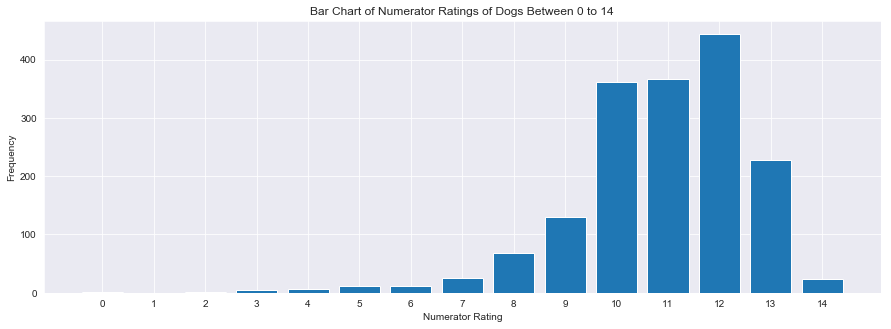

In [67]:
# Plot bar chart for the same
plt.figure(figsize=(15,5))
plt.bar(np.arange(15), rating_counts)
plt.xticks(np.arange(15))
plt.xlabel('Numerator Rating')
plt.ylabel('Frequency')
plt.title('Bar Chart of Numerator Ratings of Dogs Between 0 to 14');
plt.savefig('dog_ratings.png')

Most of the images are rated between 10 to 13.

In [68]:
merged_df.favorite_count.describe()

count     1699.000000
mean      8392.066510
std      10029.986285
min         77.000000
25%       2164.000000
50%       4247.000000
75%      11074.000000
max      77907.000000
Name: favorite_count, dtype: float64

In [69]:
# Display row for the most and least favorite dog
merged_df[(merged_df['favorite_count'] == 77907) | (merged_df['favorite_count'] == 77)]

,tweet_id,timestamp_x,text,rating_numerator,rating_denominator,name,dogs_stage,favorite_count,retweet_count,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,year,month
60,877736472329191424,2017-06-22 03:54:17+00:00,This is Aja. She was just told she's a good do...,13,10,Aja,NaN,77907,18602,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg,...,0.837956,True,Labrador_retriever,0.062034,True,Weimaraner,0.040599,True,2017,6
1684,666102155909144576,2015-11-16 03:55:04+00:00,Oh my. Here you are seeing an Adobe Setter giv...,11,10,NaN,NaN,77,11,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,...,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True,2015,11


The most favorite dog by the twitter users is Labrador Retriever with the favorite count of 77907 and also it was retweeted 18602 times.

In [70]:
merged_df.retweet_count.describe()

count     1699.000000
mean      2415.767510
std       3099.218444
min         11.000000
25%        624.000000
50%       1345.000000
75%       3029.000000
max      29439.000000
Name: retweet_count, dtype: float64

In [71]:
# Display row for the most and least retweeted dog
merged_df[(merged_df['retweet_count'] == 29439) | (merged_df['retweet_count'] == 11)]

,tweet_id,timestamp_x,text,rating_numerator,rating_denominator,name,dogs_stage,favorite_count,retweet_count,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,year,month
303,817827839487737858,2017-01-07 20:18:46+00:00,This is Buddy. He ran into a glass door once. ...,13,10,Buddy,NaN,54783,29439,https://pbs.twimg.com/ext_tw_video_thumb/81782...,...,0.387608,True,golden_retriever,0.264844,True,Pekinese,0.122123,True,2017,1
1684,666102155909144576,2015-11-16 03:55:04+00:00,Oh my. Here you are seeing an Adobe Setter giv...,11,10,NaN,NaN,77,11,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,...,0.298617,True,Newfoundland,0.149842,True,borzoi,0.133649,True,2015,11


The most retweeted dog is Golden Retriever with the retweet count of 29439 and it was favorited 54783 times.

The least favorite and retweeted dog was a English Setter.

### References

[1] https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns

[2] https://seaborn.pydata.org/tutorial/aesthetics.html